# Tales from the Crypto

---


## 1. Sentiment Analysis

We will use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and then create a DataFrame of sentiment scores for each coin.


In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/aliait/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read the api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")


In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(q="bitcoin", language="en", sort_by="relevancy")


In [5]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q="ethereum", language="en", sort_by="relevancy")


In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:100]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2022-05-10T16:59:46Z,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964
1,2022-05-04T12:00:00Z,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882
2,2022-04-14T11:35:49Z,Wikipedia editors have voted in favor of dropp...,0.4019,0.088,0.000,0.912
3,2022-05-02T11:30:00Z,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772
4,2022-05-09T03:04:37Z,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928


In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:100]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2022-04-14T21:43:57Z,The US Department of Treasury says Lazarus is ...,-0.7845,0.088,0.231,0.681
1,2022-04-13T16:35:03Z,"18 with 15 posters participating, including st...",0.1027,0.084,0.071,0.844
2,2022-05-10T13:10:20Z,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865
3,2022-04-15T11:37:13Z,"Opera launched its dedicated ""Crypto Browser"" ...",0.7351,0.188,0.000,0.812
4,2022-05-02T15:54:35Z,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879


In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.00000,20.000000,20.000000
mean,0.039835,0.07210,0.060950,0.866900
std,0.404467,0.06750,0.061445,0.093058
min,-0.549900,0.00000,0.000000,0.557000
25%,-0.335475,0.00000,0.000000,0.836000
50%,0.089950,0.07400,0.063000,0.888000
75%,0.355075,0.08575,0.077000,0.924250
max,0.750600,0.20200,0.241000,0.964000


In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.081860,0.053050,0.069000,0.877900
std,0.481385,0.064728,0.072897,0.074939
min,-0.784500,0.000000,0.000000,0.681000
25%,-0.381800,0.000000,0.000000,0.827250
50%,-0.273200,0.023000,0.063000,0.899500
75%,0.303775,0.085000,0.077750,0.935500
max,0.735100,0.188000,0.233000,1.000000


### From the results above, we can conclude that Bitcoin has the highest mean positive score, compound score as well as the highest positive score.


---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, we will use NLTK and Python to tokenize the text for each coin. 

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, reuters
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer() 

# Create a list of stopwords
sw = set(stopwords.words('english'))
# Expand the default stopwords list if necessary
sw_addons = {'say', 'behind', 'including', 'january', 'make', 'ha', 'would', 'wa'}

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    sw_addons = {'say', 'behind', 'including', 'january', 'make', 'ha', 'would', 'wa'}
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]

    return tokens

In [13]:
# Create a new tokens column for Bitcoin
btc_df["article_tokenized"] = [tokenizer(i) for i in btc_df["text"]] 
btc_df.head()

,date,text,compound,positive,negative,neutral,article_tokenized
0,2022-05-10T16:59:46Z,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964,"[even, though, number, womenfocused, crypto, s..."
1,2022-05-04T12:00:00Z,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882,"[bitcoin, mining, site, powered, otherwise, lo..."
2,2022-04-14T11:35:49Z,Wikipedia editors have voted in favor of dropp...,0.4019,0.088,0.000,0.912,"[wikipedia, editor, voted, favor, dropping, cr..."
3,2022-05-02T11:30:00Z,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772,"[warren, buffett, always, bitcoin, skeptic, bi..."
4,2022-05-09T03:04:37Z,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928,"[image, source, getty, imagesthe, value, bitco..."


In [14]:
# Create a new tokens column for Ethereum
eth_df["article_tokenized"] = [tokenizer(i) for i in eth_df["text"]] 
eth_df.head()

,date,text,compound,positive,negative,neutral,article_tokenized
0,2022-04-14T21:43:57Z,The US Department of Treasury says Lazarus is ...,-0.7845,0.088,0.231,0.681,"[us, department, treasury, lazarus, attackthe,..."
1,2022-04-13T16:35:03Z,"18 with 15 posters participating, including st...",0.1027,0.084,0.071,0.844,"[poster, participating, story, authormore, lon..."
2,2022-05-10T13:10:20Z,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865,"[meta, revealed, nfts, work, instagram, usbase..."
3,2022-04-15T11:37:13Z,"Opera launched its dedicated ""Crypto Browser"" ...",0.7351,0.188,0.000,0.812,"[opera, launched, dedicated, crypto, browser, ..."
4,2022-05-02T15:54:35Z,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879,"[multibillion, dollar, cryptocurrency, company..."


---

### NGrams and Frequency Analysis

In this section we will look at the ngrams and word frequency for each coin. 


In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
N=2
btc_grams=ngrams(tokenizer(btc_df.text.str.cat()),N)
Counter(btc_grams).most_common(10)

[(('reuters', 'bitcoin'), 5),
 (('previous', 'closebitcoin'), 4),
 (('closebitcoin', 'world'), 4),
 (('world', 'biggest'), 4),
 (('biggest', 'bestknown'), 4),
 (('bestknown', 'cryptocurrency'), 4),
 (('charsmay', 'reuters'), 3),
 (('interest', 'rate'), 2),
 (('bitcoin', 'dropped'), 2),
 (('cryptocurrency', 'year'), 2)]

In [17]:
# Generate the Ethereum N-grams where N=2
N=2
eth_grams=ngrams(tokenizer(eth_df.text.str.cat()),N)
Counter(eth_grams).most_common(10)

[(('reuters', 'bitcoin'), 4),
 (('previous', 'closebitcoin'), 4),
 (('closebitcoin', 'world'), 4),
 (('world', 'biggest'), 4),
 (('biggest', 'bestknown'), 4),
 (('bestknown', 'cryptocurrency'), 4),
 (('charsmay', 'reuters'), 3),
 (('yacht', 'club'), 2),
 (('charsapril', 'reuters'), 2),
 (('bitcoin', 'dropped'), 2)]

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
btc_token=tokenizer(btc_df.text.str.cat())
token_count(btc_token,10)

[('cryptocurrency', 11),
 ('bitcoin', 9),
 ('world', 6),
 ('week', 5),
 ('reuters', 5),
 ('online', 4),
 ('investor', 4),
 ('dropped', 4),
 ('previous', 4),
 ('closebitcoin', 4)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
eth_token=tokenizer(eth_df.text.str.cat())
token_count(eth_token,10)

[('cryptocurrency', 8),
 ('bitcoin', 7),
 ('biggest', 5),
 ('reuters', 5),
 ('world', 5),
 ('ethereum', 4),
 ('year', 4),
 ('previous', 4),
 ('closebitcoin', 4),
 ('bestknown', 4)]

---

### Word Clouds

We will now generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'BTC WORLD CLOUD')

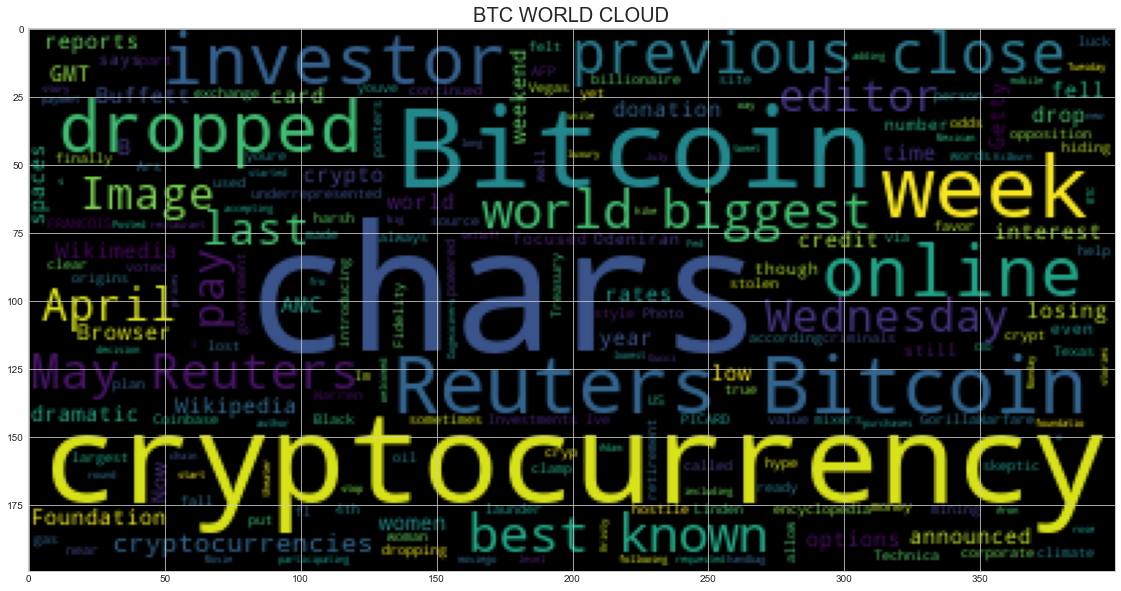

In [22]:
# Generate the Bitcoin word cloud
wc_btc = WordCloud().generate(btc_df.text.str.cat())
plt.imshow(wc_btc)
plt.title("BTC WORLD CLOUD",size=20)

Text(0.5, 1.0, 'ETH WORLD CLOUD')

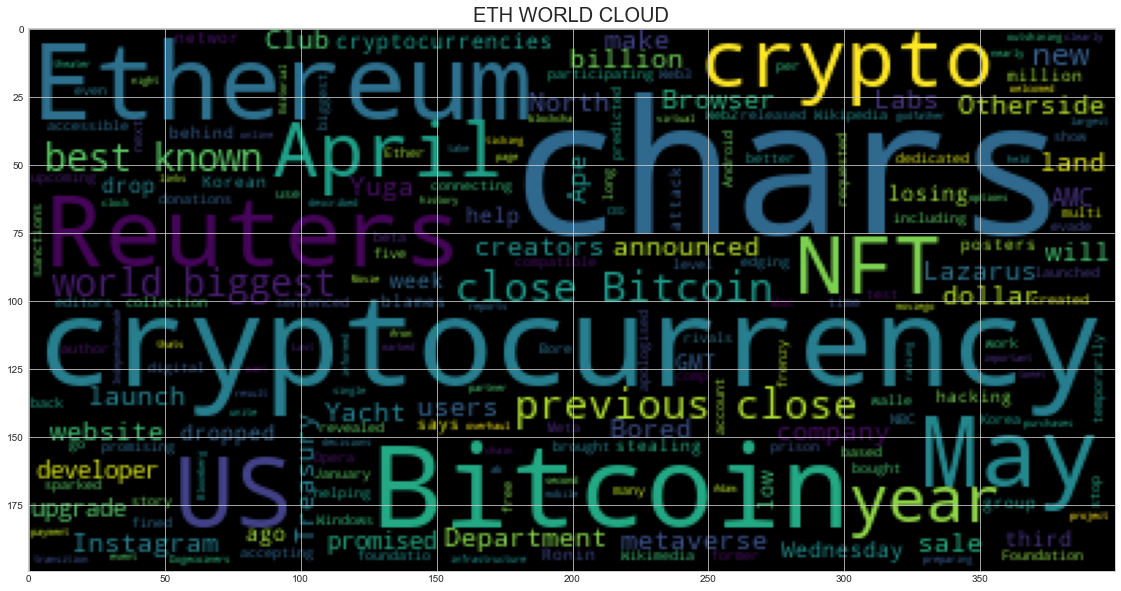

In [23]:
# Generate the Ethereum word cloud
wc_eth = WordCloud().generate(eth_df.text.str.cat())
plt.imshow(wc_eth)
plt.title("ETH WORLD CLOUD",size=20)

---
## 3. Named Entity Recognition

Finally, we will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [26]:
# Concatenate all of the Bitcoin text together
btc_text=btc_df.text.str.cat()

In [27]:
# Run the NER processor on all of the text
doc = nlp(btc_text)
# Add a title to the document
doc.user_data["title"] = "BTC Entity Recognition"

In [28]:
# Render the visualization
displacy.render(doc, style='ent') 

In [29]:
# List all Entities
print([ent.text for ent in doc.ents]) 

['Odeniran', 'Linden', 'Texas', 'April 4th, 2022', 'Photo', 'FRANCOIS PICARD/AFP', 'Getty Images', "the Wikimedia Foundation's", 'Ars Technica', 'GorillaWarfare', 'Buffett', 'the weekend', 'Getty Images\r\n', 'the weekend', '34,000', '27,630', 'Coinbase', 'Last week', 'Fidelity Investments', 'the US Treasury', '15', 'More than 200', 'Wikipedia', 'the Wikimedia Foundation', 'last July', '33,000', 'the week', 'last week', 'Fed', '26', 'Reuters', '5.1%', '38,391.36', 'Tuesday', '2,229.82', '16%', 'year', '+339 chars]May 4', 'Reuters', '5.7%', '39,862.84', 'Wednesday', '2,102.94', '20.9%', 'year', 'Bitcoin', 'Gucci handbag', 'week', 'Kristy Kilburn', 'May 11', 'Reuters', '7.23%', '28,758.29', 'GMT', 'Wednesday', '2,241.68', '40.4%', '+361 chars]May 9', 'Reuters', '7.81%', '31,333.41', 'GMT', 'Monday', '2,655.98', '35%', 'AMC', 'April 15', 'AMC', 'Adam Aron', 'Mexican', 'North London', 'a few weeks ago', '+2779', 'Crypto Browser', 'January', 'Windows, Mac', 'Android', '10', 'Reuters', 'char

---

### Ethereum NER

In [30]:
# Concatenate all of the Ethereum text together
eth_text=eth_df.text.str.cat()

In [31]:
# Run the NER processor on all of the text
doc = nlp(eth_text)
# Add a title to the document
doc.user_data["title"] = "ETH Entity Recognition"

In [32]:
# Render the visualization
displacy.render(doc, style='ent') 

In [33]:
# List all Entities
print([ent.text for ent in doc.ents]) 

['The US Department of Treasury', 'The US Treasury Department', 'North Korean', '$625 million', 'Ronin', '15', 'More than 200', 'Wikipedia', 'the Wikimedia Foundation', '+4016', 'Instagram', 'US', 'Instagram', 'Crypto Browser', 'January', 'Windows, Mac', 'Android', 'Ethereum', 'Yuga Labs', 'Yacht Club', 'Yuga Labs', 'Otherside NFT', 'April 30', 'NFT', 'Ethereum', 'more than five years', '100,000', 'North Korea', 'US', 'NBC News', 'chars]April 26', 'Reuters', 'No.2', 'second', 'AMC', 'April 15', 'AMC', 'Adam Aron', 'Last night', 'Bloomberg', 'nearly a third', 'a billion dollars', 'IndependenceWe', 'this week', 'the Ukrainian Computer Emergency Response Team', 'Slovakian', 'Russia', 'chars]40 days ago', '47,454', '34,007', '28%.About a third', 'this week', 'Ethereum', 'Merge', 'a few months after June', 'first', 'a year and a half ago', 'The Order Flow', 'Dan Robinson', "Georgios Konstantopoulos'", 'August 20', '26', 'Reuters', '5.1%', '38,391.36', 'Tuesday', '2,229.82', '16%', 'year', '

---